<p><b>Objective</b>: To gather and analyze data on BKK tram, bus and metro routes, focusing on Wheelchair accessibility. Specifically, using data from the BKK API, determine what share of the BKK network is accessible to people in wheelchairs. Given a list of wheelchair accessible stations, generate data on which stations can be reached from those starting points. <br><br>
<b>Key Concepts and tools</b>: Data from APIs, requests, data analysis</p>

In [24]:
import requests
import json
import pandas as pd

def fetch_and_save_data():
    # Define the URL and parameters
    url = 'https://futar.bkk.hu/api/query/v1/ws/otp/api/where/stops-for-location'
    # Define the parameters in a dictionary
    params = {
        'lat': 47.4973131430789,
        'lon': 19.064639534671457,
        'latSpan': 0.013365429598373169,
        'lonSpan': 0.032126676908724505,
        'radius': 100,
        'minResult': 5,
        'appVersion': '1.1.abc',
        'version': 2,
        'includeReferences': 'true',
        'key': '3dfc5343-58ca-4976-8cfb-adbea8b9d791'
    }

    # Define the headers
    headers = {
        'accept': 'application/json'
    }

    # Make the GET request
    response = requests.get(url, params=params, headers=headers)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the JSON response
        data = response.json()
        
        # Filter the stops where "wheelchairBoarding": true
        all_stops = [stop for stop in data['data']['list']]
        
        # Convert the filtered data to a DataFrame
        df = pd.DataFrame(all_stops)
        
        # Save the DataFrame to a CSV file
        filename = 'all_stops.csv'
        df.to_csv(filename, index=False)
        
        print(f"All stops are saved to {filename}")
    else:
        # Print the error code and response text if the request failed
        print(f"Error: {response.status_code}, {response.text}")

# Call the function to fetch and save the data

In [25]:
fetch_and_save_data()

All stops are saved to all_stops.csv


In [26]:
import pandas as pd
import folium
import os
import webbrowser
#Draws a map that contains all stops that can be reached from given location.
class Map():
    def __init__(self, df):
        # Create a map centered around the first stop
        # atts and tiles are needed to plot 
        attr = ('&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> ''contributors, &copy; <a href="https://cartodb.com/attributions">CartoDB</a>')
        tiles = "https://{s}.basemaps.cartocdn.com/light_nolabels/{z}/{x}/{y}.png"
        m = folium.Map(location=[df['lat'].mean(), df['lon'].mean()], zoom_start=13, tiles=tiles, attr=attr)

        # Add the stops to the map
        for idx, row in df.iterrows():
            folium.Marker(
                location=[row['lat'], row['lon']],
                popup=(
                    f"{row['name']}<br>"
                    f"{row['stopColorType']}"
                    # f"Locality: {row['localityName']}<br>" # IF you want the map to show the district num
                ),
                icon=folium.Icon(color='blue' if row['wheelchairBoarding'] else 'red')
            ).add_to(m)

        # Define the filename and save the map to an HTML file
        filename = 'map.html'
        m.save(filename)

        print("Map has been saved to", filename)
        # Open the saved HTML file in the default web browser
        webbrowser.open('file://' + os.path.realpath(filename))


In [27]:
import pandas as pd

class Stops:
    def __init__(self, filename) -> None:
        self.data = pd.read_csv(filename)

    def all_stops(self):
        return self.data
    
    def wheelchair_accessible(self):
        # Filter the DataFrame to only include stops that are wheelchair accessible
        return self.data[self.data['wheelchairBoarding'] == True]
    
    def by_district(self, district):
        return self.data[self.data['localityName'] // 10 == district  // 10]
    
    def by_transport(self, types):
        return self.data[self.data['stopColorType'] == types]


In [28]:
stops = Stops('all_stops.csv')
district_map = {101: 'I', 102: 'II', 103: 'III', 104: 'IV', 105: 'V', 106: 'VI', 107: 'VII', 108: 'VIII', 109: 'IX', 110: 'X', 111: 'XI', \
112: 'XII', 113: 'XIII', 114: 'XIV', 115: 'XV', 116: 'XVI', 117: 'XVII', 118: 'XVIII', 119: 'XIX', 120: 'XXI', 121: 'XXII', 122: 'XXIII'}

In [29]:
#Overall: 538 stops
print(f"Overall: {len(stops.all_stops())} stops")

#Wheelchair Accessible: 375 stops
print(f"Wheelchair Accessible: {len(stops.wheelchair_accessible())} stops")

#V district: 93 stops
district = 105_5 #Only first 3-digits matter but input 4-digit number please
print(f"{district_map[district // 10]} district: {len(stops.by_district(district))} stops")

#BUS: 171 stops
type = ['OTHER', 'TRAM', 'NIGHTBUS', 'BUS', 'M4', 'TROLLEYBUS', 'TROLLEYBUS-BUS', 'M2', 'M3', 'H5', 'M1', 'TRAM-TROLLEYBUS-BUS', 'TRAM-BUS']
print(f"{type[3]}: {len(stops.by_transport(type[3]))} stops")
# Map(stops.all_stops())
# Map(stops.by_district(district))
# Map(stops.wheelchair_accessible(stops.by_transport(type[3])))

Overall: 544 stops
Wheelchair Accessible: 377 stops
V district: 93 stops
BUS: 544 stops


In [30]:
import matplotlib.pyplot as plt
import pandas as pd

class Stats:
    def __init__(self, filename) -> None:
        self.data = pd.read_csv(filename)
    
    def wheelchair_accessible(self):
        return self.data[self.data['wheelchairBoarding'] == True]
    
    def wheelchair_inaccessible(self):
        return self.data[self.data['wheelchairBoarding'] == False]
    
    def stat_by_district(self, df=None):
        """Calculate statistics by district for a given DataFrame (defaults to self.data)"""
        if df is None:
            df = self.data
            
        district_map = {101: 'I', 102: 'II', 103: 'III', 104: 'IV', 105: 'V', 
                       106: 'VI', 107: 'VII', 108: 'VIII', 109: 'IX', 110: 'X', 
                       111: 'XI', 112: 'XII', 113: 'XIII', 114: 'XIV', 115: 'XV', 
                       116: 'XVI', 117: 'XVII', 118: 'XVIII', 119: 'XIX', 
                       120: 'XXI', 121: 'XXII', 122: 'XXIII'}
        res = {}
        # Initialize counts for each district to zero
        for district_num in district_map:
            res[district_map[district_num]] = 0
        # Iterate through each localityName and increment counts for corresponding districts
        for district_num in df['localityName']:
            district_roman = district_map[district_num // 10]
            res[district_roman] += 1
        return res
    
    def plot_graph(self, data):
        district_counts_filtered = {district: count for district, count in data.items() if count != 0}
        plt.figure(figsize=(10, 6))
        plt.bar(district_counts_filtered.keys(), district_counts_filtered.values(), color='skyblue')
        plt.xlabel('District')
        plt.ylabel('Number of Stops')
        plt.title('Distribution of Stops by District')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def plot_double_graph(self):
        """Compare wheelchair accessible vs inaccessible stops by district"""
        # Get stats for both types of stops
        accessible_stats = self.stat_by_district(self.wheelchair_accessible())
        inaccessible_stats = self.stat_by_district(self.wheelchair_inaccessible())
        
        # Filter out districts with zero counts and sort by district number
        accessible_stats = {district: count for district, count in accessible_stats.items() if count != 0}
        inaccessible_stats = {district: count for district, count in inaccessible_stats.items() if count != 0}
        
        # Create mapping for proper Roman numeral sorting
        roman_to_num = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5,
                       'VI': 6, 'VII': 7, 'VIII': 8, 'IX': 9, 'X': 10,
                       'XI': 11, 'XII': 12, 'XIII': 13, 'XIV': 14, 'XV': 15,
                       'XVI': 16, 'XVII': 17, 'XVIII': 18, 'XIX': 19,
                       'XXI': 21, 'XXII': 22, 'XXIII': 23}
        
        # Get sorted list of all districts present in either dataset
        all_districts = sorted(set(accessible_stats.keys()).union(set(inaccessible_stats.keys())),
                             key=lambda x: roman_to_num[x])
        
        # Prepare data for plotting
        accessible_counts = [accessible_stats.get(district, 0) for district in all_districts]
        inaccessible_counts = [inaccessible_stats.get(district, 0) for district in all_districts]
        
        # Create figure and axis
        plt.figure(figsize=(12, 6))
        bar_width = 0.35
        x = range(len(all_districts))
        
        # Plot bars
        plt.bar(x, accessible_counts, bar_width, color='blue', label='Wheelchair Accessible')
        plt.bar([i + bar_width for i in x], inaccessible_counts, bar_width, color='red', label='Not Wheelchair Accessible')
        
        # Customize plot
        plt.xlabel('District')
        plt.ylabel('Number of Stops')
        plt.title('Comparison of Wheelchair Accessibility by District')
        plt.xticks([i + bar_width/2 for i in x], all_districts, rotation=45)
        plt.legend()
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

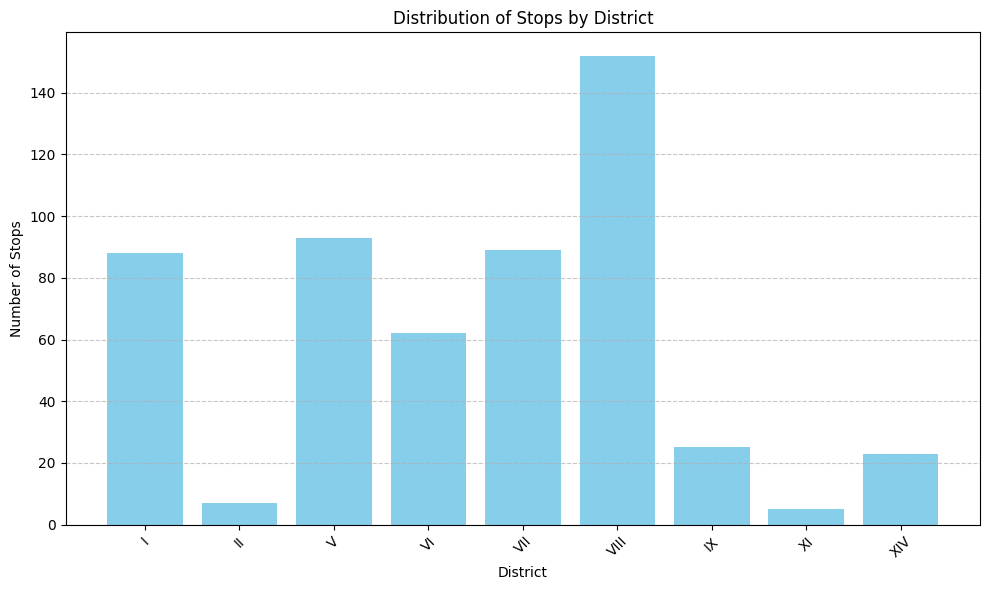

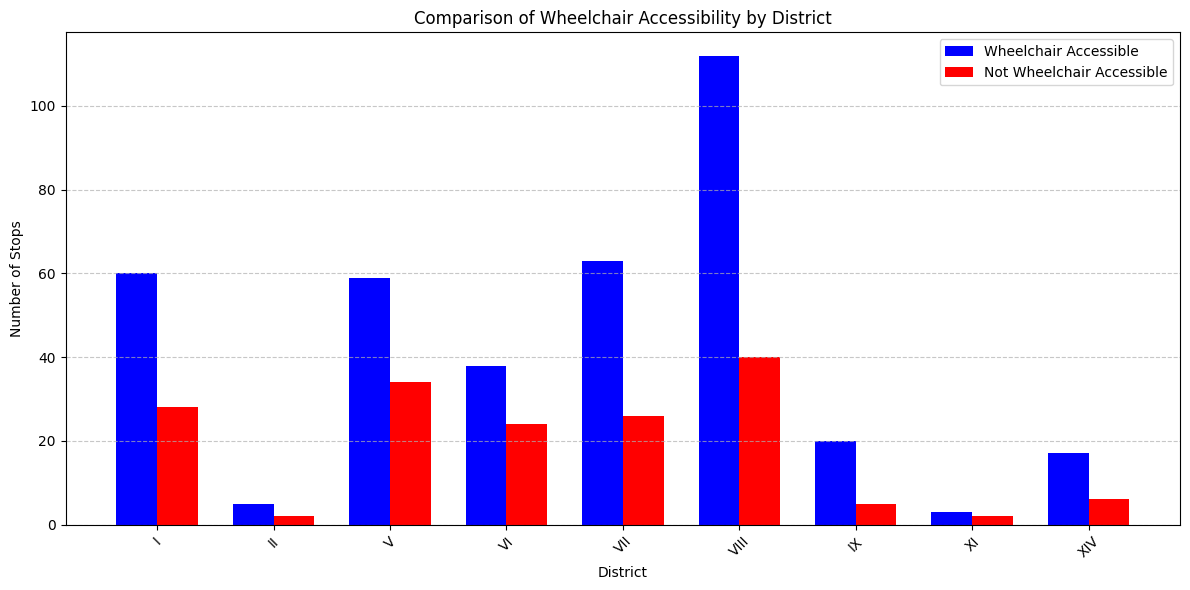

In [31]:
# Example usage:
stats = Stats('all_stops.csv')
# Plot single graph of all stops by district
stats.plot_graph(stats.stat_by_district())
# Plot comparison of wheelchair accessible vs inaccessible stops
stats.plot_double_graph()

In [32]:
import folium
from folium.plugins import MarkerCluster
import webbrowser
import os
from IPython.display import display

class Map:
    def __init__(self, df):
        """
        Initialize the Map with stops data.
        
        Args:
            df (DataFrame): DataFrame containing stop information
        """
        self.df = df
        self.map = None
        
    def create_clustered_map(self):
        """Create a clustered map showing wheelchair accessibility with legend"""
        # Create base map centered on the stops
        center_lat = self.df['lat'].mean()
        center_lon = self.df['lon'].mean()
        
        attr = ('&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> '
                'contributors, &copy; <a href="https://cartodb.com/attributions">CartoDB</a>')
        tiles = "https://{s}.basemaps.cartocdn.com/light_nolabels/{z}/{x}/{y}.png"
        
        self.map = folium.Map(location=[center_lat, center_lon], 
                            zoom_start=13,
                            tiles=tiles,
                            attr=attr)
        
        # Create marker cluster
        marker_cluster = MarkerCluster().add_to(self.map)
        
        # Add markers with color coding for wheelchair accessibility
        for idx, row in self.df.iterrows():
            color = 'green' if row['wheelchairBoarding'] else 'red'
            icon = 'check' if row['wheelchairBoarding'] else 'remove'
            
            folium.Marker(
                location=[row['lat'], row['lon']],
                popup=f"{row['name']}<br>Type: {row['stopColorType']}<br>"
                     f"Wheelchair: {'Yes' if row['wheelchairBoarding'] else 'No'}",
                icon=folium.Icon(color=color, icon=icon, prefix='fa')
            ).add_to(marker_cluster)
        
        # Add legend
        legend_html = '''
            <div style="position: fixed; 
                        bottom: 50px; left: 50px; width: 150px; height: 80px; 
                        border:2px solid grey; z-index:9999; font-size:14px;
                        background-color:white;
                        ">
                <div style="padding: 5px;">
                    <i class="fa fa-map-marker fa-2x" style="color:green"></i> Accessible<br>
                    <i class="fa fa-map-marker fa-2x" style="color:red"></i> Not accessible
                </div>
            </div>
        '''
        self.map.get_root().html.add_child(folium.Element(legend_html))
            
        return self
    
    def show(self, filename='map.html', open_browser=True):
        """
        Display the map and optionally open in browser.
        
        Args:
            filename (str): File to save the map to
            open_browser (bool): Whether to open in default browser
        """
        if self.map is None:
            self.create_clustered_map()
            
        self.map.save(filename)
        
        if open_browser:
            webbrowser.open('file://' + os.path.realpath(filename))
            
        display(self.map)
        return self

In [33]:
# Create and show a clustered map of all stops with accessibility legend
# Map(stops.all_stops()).show()

# For accessible stops only
# accessible_stops = stops.wheelchair_accessible()
# Map(accessible_stops).show('accessible_stops.html')

# For a specific district
# district_stops = stops.by_district(105)
# Map(district_stops).show('district_v_stops.html')

# For a specific transport type
bus_stops = stops.by_transport('BUS')
Map(bus_stops).show('bus_stops.html')